# <span style="color:RoyalBlue">Introducción a librerías básicas para uso científico</span>

## <span style="color:CornflowerBlue">**Pandas**</span>

[Pandas](https://pandas.pydata.org) es una biblioteca muy popular para manipulación de datos. El nombre se deriva de "**pan**el **da**ta", un término usado en econometría para conjuntos de datos. Permite sistematizar mediante funciones la conversión de un archivo en los tipos de datos que Python maneja.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/1200px-Pandas_logo.svg.png" width=600px>

## Inicio

El primer requisito, como con las demás bibliotecas es su importación

In [1]:
import pandas as pd

## Creación de datos

Esta biblioteca tiene dos objetos básicos: **DataFrames** y **Series**

### DataFrames
Se puede ver a un DataFrame como una estructura tabular. Una tabla de datos, con columnas y filas, donde las columnas pueden ser de múltiples tipos.

La carga manual de DataFrames se puede hacer de la siguiente forma:

In [2]:
df = pd.DataFrame({'Si': [50, 21], 'No': [131, 142]})
df

,Si,No
0,50,131
1,21,142


En ese ejemplo se puede ver que se ingresan los datos por columnas. La sintaxis involucra un diccionario Python cuyas "claves" son los nombres de las columnas (*Si* y *No* en este ejemplo), y cuyos "valores" se especifican con una lista. 

Si bien en el ejemplo los elementos son de tipo *int*, la estructura admite otros tipos de datos (*float*, *str*, etc.)

### Series
Si un DataFrame es una tabla, una Serie se asemeja a una lista (con índices). Y de hecho se puede crear una con una lista: 

In [3]:
s = pd.Series([1, 2, 3, 4, 5])
s

0    1
1    2
2    3
3    4
4    5
dtype: int64

Una Serie es, en esencia, una sola columna de un DataFrame. Una serie no tiene un nombre de columna, solo tiene el nombre de variable.

## Lectura de Archivos de Datos

Si bien se pueden crear DataFrames o Series a mano, en la práctica estos datos en general se importan desde archivos o consultas a base de datos.

Uno de los formatos de archivo más básico (y más utilizado) para trabajar haciendo análisis de datos es el CSV (*Comma-Separated Values*), que como indica su nombre contiene valores separados por coma.

Vamos a usar el archivo **diabetes.csv**. Este conjunto de datos proviene originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales de EEUU. Su objetivo es predecir de manera diagnóstica si un paciente tiene o no diabetes, en función de ciertas medidas incluidas en el conjunto de datos. Los datos provienen de pacientes mujeres de al menos 21 años descendientes de Pima Indians (grupo nativo americano originario de México y Arizona).

In [4]:
diabetes_data = pd.read_csv("datos/diabetes.csv")

Se puede usar el atributo *shape* para conocer la dimensión del DataFrame


In [5]:
diabetes_data.shape

(768, 9)

Es decir, el DataFrame tiene 769 registros organizados en 9 columnas.

También podemos obtener información general sobre el DataFramediabetes_data[

In [6]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Podemos examinar el contenido del DataFrame resultante usando el comando head(), que muestra las primeras cinco filas:

In [7]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


La función pd.read_csv() tiene más de 30 parámetros opcionales que pueden especificar.

## Indexado, Selección y Asignación


Para estas tareas es posible emplear funciones nativas de Python o propias de Pandas.

### Indexado con Funciones Nativas

Pandas soporta los métodos nativos de Python de indexación. Por ejemplo, se puede acceder a la propiedad de un objeto a través de sus atributos. Para el ejemplo previo, se puede acceder a la propiedad *Age* del Dataframe de la siguinte forma :


In [8]:
diabetes_data.Age

0      50
1      31
2      32
3      21
4      33
       ..
763    63
764    27
765    30
766    47
767    23
Name: Age, Length: 768, dtype: int64

Como dijimos que el DataFrame era un diccionario de Python, se puede usar el indexado de diccionarios para obtener los valores deseados:

In [9]:
diabetes_data['Age']

0      50
1      31
2      32
3      21
4      33
       ..
763    63
764    27
765    30
766    47
767    23
Name: Age, Length: 768, dtype: int64

Esas son dos formas de seleccionar una Serie específica de un DataFrame.
Ninguna es mejor o peor desde el punto de vista sintáctico, pero el operador de indexación **[ ]** tiene la ventaja que puede manejar nombres de columnas con caracteres reservados (por ejemplo, si tuviéramos una columna con nombre blood.pressure, no se podría acceder a su contenido haciendo diabetes_data.blood.pressure, pero sí haciendo diabetes_data[blood.pressure].

Para conseguir un valor específico de la serie se puede usar el operador de indexación [] una vez más: 

In [10]:
diabetes_data['Age'][0]

50

### Indexado en Pandas

Si bien se puede emplear los métodos anteriores para el acceso a DataFrames, en general al trabajar con Pandas se recomienda emplear los métodos de acceso propios de esta biblioteca: *loc* e *iloc* ya que están optimizados

#### iloc: Indexación basada en índices

Con este método los datos se seleccionan a partir de sus posiciones numéricas.

Por ejemplo si se quiere seleccionar la primera fila:

In [11]:
diabetes_data.iloc[0]

Pregnancies                   6.000
Glucose                     148.000
BloodPressure                72.000
SkinThickness                35.000
Insulin                       0.000
BMI                          33.600
DiabetesPedigreeFunction      0.627
Age                          50.000
Outcome                       1.000
Name: 0, dtype: float64

Tanto en *loc* como en *iloc* el primer identificador corresponde a las filas y el segundo a las columnas. Este es el orden opuesto al que emplea Python nativo, en donde se indica primero la columna, luego la fila. 
Es decir que para recuperar la primera columna se haría:

In [12]:
diabetes_data.iloc[:, 0]

0       6
1       1
2       8
3       1
4       0
       ..
763    10
764     2
765     5
766     1
767     1
Name: Pregnancies, Length: 768, dtype: int64

#### loc: Indexación basada en etiquetas

En este paradigma, es el valor del índice de datos, no su posición, lo que importa.
Por ejemplo, para obtener la primera fila de registros, haríamos lo siguiente: 

In [13]:
diabetes_data.loc[0, 'Age']

50

Si se quisiera seleccionar un subconjunto de atributos del DataFrame se podría hacer:

In [14]:
diabetes_data.loc[:, ['Age', 'Pregnancies', 'BMI']]

,Age,Pregnancies,BMI
0,50,6,33.6
1,31,1,26.6
2,32,8,23.3
3,21,1,28.1
4,33,0,43.1
...,...,...,...
763,63,10,32.9
764,27,2,36.8
765,30,5,26.2
766,47,1,30.1


Al  momento de optar entre *loc* e *iloc* se debe saber que ambos métodos tienen esquemas de indexado diferentes.
iloc utiliza el esquema de indexado de la *stdlib* de Python, donde el primer elemento del rango está incluído y el último excluído. Por ejemplo 0:10 va a seleccionar entre 0, 1, ..., 9, mientras que iloc indexa de manera inclusiva y 0:10, es decir, los elementos 0, 1, ..., 10.

Esa diferencia resulta particularmente confusa cuando el índice del DataFrame es una lista numérica simple, ej: 0, 1, ..., 1000. En ese caso df.iloc [0:1000] devolverá 1000 elementos, mientras que df.loc [0:1000] devolverá 1001.

### Selección condicional

Es posible aprovechar la funcionalidad de *loc* para filtrar los datos, seleccionando los casos que se correspondan con una condición específica, por ejemplo personas de más de 50 años:

In [15]:
diabetes_data.loc[diabetes_data.Age > 50]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1
12,10,139,80,0,0,27.1,1.441,57,0
13,1,189,60,23,846,30.1,0.398,59,1
14,5,166,72,19,175,25.8,0.587,51,1
...,...,...,...,...,...,...,...,...,...
719,5,97,76,27,0,35.6,0.378,52,1
734,2,105,75,0,0,23.3,0.560,53,0
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1


Esto es equivalente a escribir:

In [16]:
diabetes_data[diabetes_data.Age > 50]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1
12,10,139,80,0,0,27.1,1.441,57,0
13,1,189,60,23,846,30.1,0.398,59,1
14,5,166,72,19,175,25.8,0.587,51,1
...,...,...,...,...,...,...,...,...,...
719,5,97,76,27,0,35.6,0.378,52,1
734,2,105,75,0,0,23.3,0.560,53,0
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1


Si además quisiéramos excluir a todas aquellas personas que tuvieron menos de 4 embarazos se podría hacer:

In [17]:
diabetes_data[(diabetes_data.Age > 50) & (diabetes_data.Pregnancies >= 4)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
12,10,139,80,0,0,27.1,1.441,57,0
14,5,166,72,19,175,25.8,0.587,51,1
24,11,143,94,33,146,36.6,0.254,51,1
28,13,145,82,19,110,22.2,0.245,57,0
...,...,...,...,...,...,...,...,...,...
684,5,136,82,0,0,0.0,0.640,69,0
717,10,94,72,18,0,23.1,0.595,56,0
719,5,97,76,27,0,35.6,0.378,52,1
759,6,190,92,0,0,35.5,0.278,66,1


Pandas viene con algunos selectores condicionales incorporados. Vamos a ver dos de ellos

El primero es *isin*, que permite seleccionar datos cuyo valor "está en" una lista de valores. Por ejemplo, se puede seleccionar los registros de pacientes con 3 o 4 embarazos: 


In [18]:
diabetes_data[diabetes_data.Pregnancies.isin([3, 4])]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,3,78,50,32,88,31.0,0.248,26,1
10,4,110,92,0,0,37.6,0.191,30,0
20,3,126,88,41,235,39.3,0.704,27,0
31,3,158,76,36,245,31.6,0.851,28,1
32,3,88,58,11,54,24.8,0.267,22,0
...,...,...,...,...,...,...,...,...,...
735,4,95,60,32,0,35.4,0.284,28,0
741,3,102,44,20,94,30.8,0.400,26,0
748,3,187,70,22,200,36.4,0.408,36,1
750,4,136,70,0,0,31.2,1.182,22,1


El segundo es *isnull* (y su complemento *notnull*), que permiten recuperar valores que están (o no están) vacíos (NaN). Por ejemplo, para filtrar los casos que no se conozca la presión arterial haríamos:

In [19]:
diabetes_data[diabetes_data.BloodPressure.isnull()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


### Asignación

La asignación de valores es sencilla. Por ejemplo, se puede asignar un valor constante a un conjunto de filas de la siguiente forma:

In [20]:
# Creamos nueva columna que indica si la paciente ha sido madre o no
diabetes_data.loc[diabetes_data.Pregnancies >= 1, 'IsMother'] = True
diabetes_data.loc[diabetes_data.Pregnancies < 1, 'IsMother'] = False
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,IsMother
0,6,148,72,35,0,33.6,0.627,50,1,True
1,1,85,66,29,0,26.6,0.351,31,0,True
2,8,183,64,0,0,23.3,0.672,32,1,True
3,1,89,66,23,94,28.1,0.167,21,0,True
4,0,137,40,35,168,43.1,2.288,33,1,False
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,True
764,2,122,70,27,0,36.8,0.340,27,0,True
765,5,121,72,23,112,26.2,0.245,30,0,True
766,1,126,60,0,0,30.1,0.349,47,1,True


También se pueden crear nuevas columnas mediante operaciones con otras columnas

In [21]:
# Calculamos la edad en meses
diabetes_data['AgeMonths'] = diabetes_data['Age'] * 12
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,IsMother,AgeMonths
0,6,148,72,35,0,33.6,0.627,50,1,True,600
1,1,85,66,29,0,26.6,0.351,31,0,True,372
2,8,183,64,0,0,23.3,0.672,32,1,True,384
3,1,89,66,23,94,28.1,0.167,21,0,True,252
4,0,137,40,35,168,43.1,2.288,33,1,False,396
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,True,756
764,2,122,70,27,0,36.8,0.340,27,0,True,324
765,5,121,72,23,112,26.2,0.245,30,0,True,360
766,1,126,60,0,0,30.1,0.349,47,1,True,564


## Comenzando con el análisis de datos con Pandas

Estadística descriptiva

In [22]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeMonths
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958,398.890625
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951,141.122778
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,252.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000,288.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000,348.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000,492.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,972.000000


In [23]:
# Importamos librerías de graficación
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

Realizamos histogramas para cada variable numérica

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>],
       [<Axes: title={'center': 'AgeMonths'}>, <Axes: >, <Axes: >]],
      dtype=object)

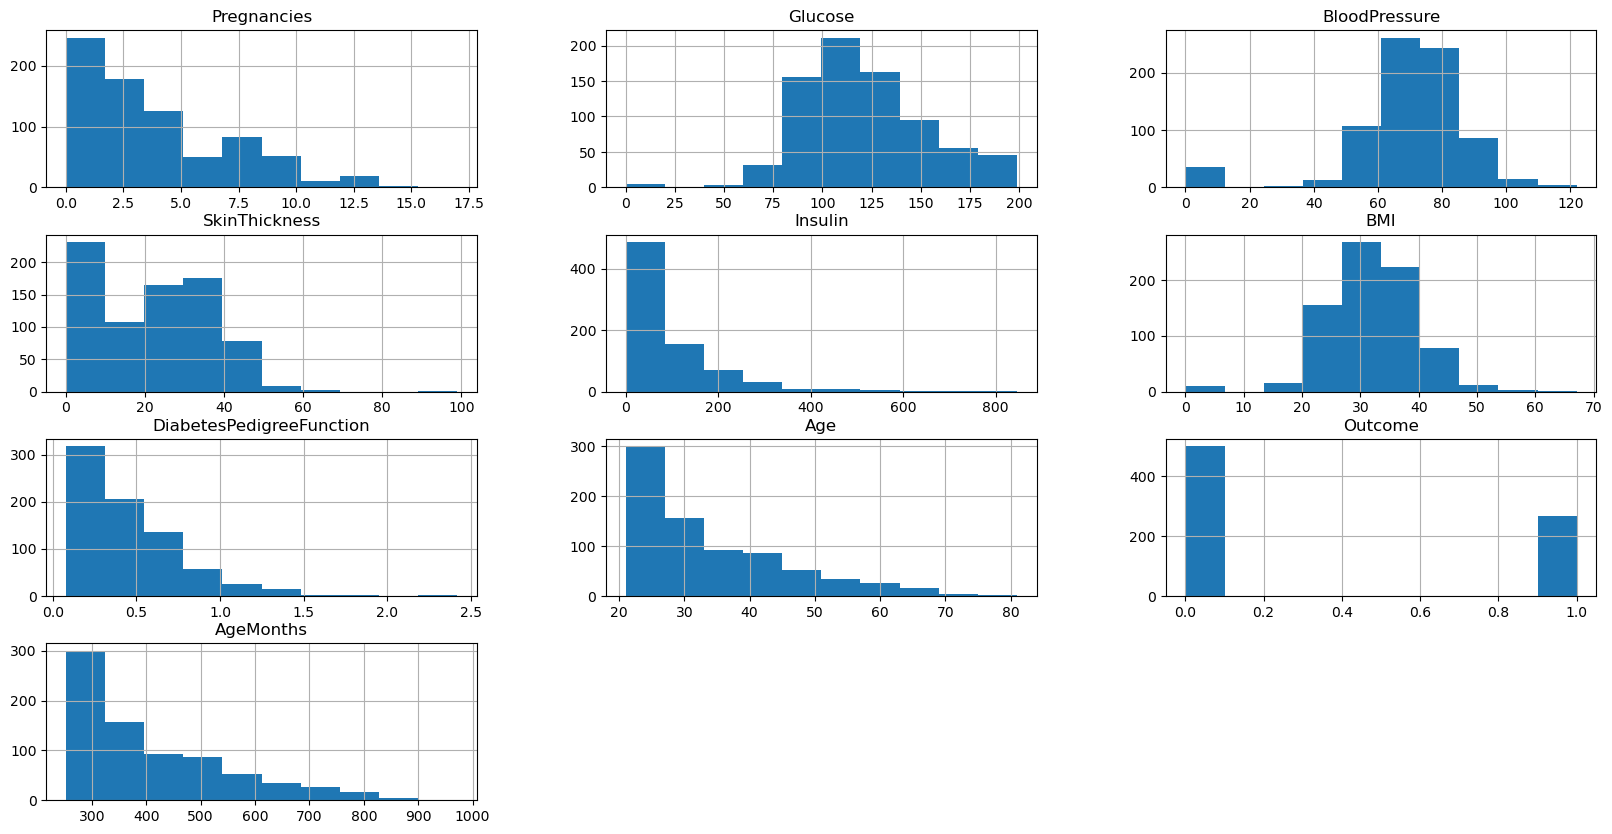

In [24]:
diabetes_data.hist()

Correlaciones entre las variables (también se pueden hacer gráficos, pero ahora no lo veremos)

In [25]:
diabetes_data.corr(method='pearson', numeric_only=True)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeMonths
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356,1.000000
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000,0.238356
AgeMonths,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356,1.000000


### Agrupaciones

In [26]:
diabetes_data.groupby(['IsMother'])[['Glucose', 'BloodPressure', 'BMI']].mean()

,Glucose,BloodPressure,BMI
IsMother,,,
False,123.000000,67.153153,34.290090
True,120.538813,69.435312,31.604414


In [27]:
diabetes_data.groupby(['IsMother'])[['Glucose', 'BloodPressure', 'BMI']].agg(['mean', 'std', 'count'])

Glucose                  BloodPressure                   \
                mean        std count          mean        std count   
IsMother                                                               
False     123.000000  29.408719   111     67.153153  24.298596   111   
True      120.538813  32.393194   657     69.435312  18.392465   657   

                BMI                   
               mean        std count  
IsMother                              
False     34.290090  10.341619   111  
True      31.604414   7.328049   657

## Ejercitación 1

Usaremos el dataset anonimizado de **Notas**.

In [100]:
df = pd.read_excel('datos/notas.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1776 entries, 0 to 1775
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Año        1776 non-null   int64  
 1   Curso      1776 non-null   object 
 2   Id         1776 non-null   object 
 3   1P         1337 non-null   float64
 4   1P_R1      573 non-null    float64
 5   1P_R2      93 non-null     float64
 6   2P         1080 non-null   float64
 7   2P_R1      228 non-null    float64
 8   2P_R2      202 non-null    float64
 9   Condicion  1776 non-null   object 
 10  Modalidad  1776 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 152.8+ KB


In [101]:
df

,Año,Curso,Id,1P,1P_R1,1P_R2,2P,2P_R1,2P_R2,Condicion,Modalidad
0,2015,A,LTTH85032132739198,7.0,NaN,NaN,2.0,NaN,5.0,Regular,P
1,2015,A,TCJT10556844934684,NaN,NaN,NaN,NaN,NaN,NaN,Libre,P
2,2015,A,EUWN85586540996763,5.0,NaN,NaN,2.0,10.0,NaN,Regular,P
3,2015,A,YUCI63927275845802,NaN,NaN,NaN,NaN,NaN,NaN,Libre,P
4,2015,A,XOIM06427265655771,6.0,NaN,NaN,2.0,2.0,4.0,Regular,P
...,...,...,...,...,...,...,...,...,...,...,...
1771,2021,B,VDSO83627610348266,8.0,NaN,NaN,2.0,5.0,NaN,Regular,V
1772,2021,B,UUKM75148322460403,10.0,NaN,NaN,NaN,NaN,NaN,Libre,V
1773,2021,B,SKKA39641416427725,1.0,NaN,NaN,NaN,NaN,NaN,Libre,V
1774,2021,B,LIPD10614879082446,NaN,NaN,NaN,NaN,NaN,NaN,Libre,V


Las columnas *Año*, *Curso*, *Condicion*, *Modalidad* son datos que llamamos **Categóricos**, es decir, los valores se pueden identificar por número finito de nombres o etiquetas.

En Pandas la utilización de datos categóricos tiene algunas ventajas:
- Búsqueda mucho más rápida
- Ocupan menos memoria
- Se pueden convertir a Datos Categoricos Ordinales

Por esto, vamos a realizar la conversión de dichas columnas:

In [121]:
df['Año'] = df['Año'].astype('category')
df['Curso'] = df['Curso'].astype('category')
df['Condicion'] = df['Condicion'].astype('category')
df['Modalidad'] = df['Modalidad'].astype('category')

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1776 entries, 0 to 1775
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Año        1776 non-null   category
 1   Curso      1776 non-null   category
 2   Id         1776 non-null   object  
 3   1P         1337 non-null   float64 
 4   1P_R1      573 non-null    float64 
 5   1P_R2      93 non-null     float64 
 6   2P         1080 non-null   float64 
 7   2P_R1      228 non-null    float64 
 8   2P_R2      202 non-null    float64 
 9   Condicion  1776 non-null   category
 10  Modalidad  1776 non-null   category
dtypes: category(4), float64(6), object(1)
memory usage: 104.9+ KB


**Comencemos con la ejercitación**

Primero calculemos:
- Promedio y desviación estándar de notas del 1º Parcial
- Promedio y desviación estándar de notas del 2º Parcial


Ahora hagamos un poco más interesante:
- Porcentaje de alumnos "Libres" que rindieron el 1º Parcial
- Porcentaje de alumnos "Libres" que rindieron el 2º Parcial
- Porcentaje de alumnos que se presentaron a rendir el 1º Parcial y aprobaron (nota $\geq$ 4)
- Porcentaje de alumnos que se presentaron a rendir el 2º Parcial y aprobaron (nota $\geq$ 4)

Seguimos con algo más interesante aún:
- Promedio de notas de cada parcial y recuperatorio por año
- Promedio de notas de cada parcial y recuperatorio por año y curso
- Promedio de notas de cada parcial y recuperatorio por modalidad
- Porcentaje de alumnos por condición
- Porcentaje de alumnos por condición y año
- Porcentaje de alumnos por condición, modalidad y curso

Por último, una tarea desafío:
- Calcular la cantidad de alumnos que fueron recursantes y la cantidad de veces que cada uno de ellos cursó la materia
- ¿Qué porcentaje representa esta cantidad de alumnos del total?
    - *Ayuda:* utilizar la función `duplicated(keep=False)` del DataFrame que indica todas las filas que contienen valores duplicados

Todos estos resultados son más descriptivos si los vemos visualmente mediante gráficos. Esto lo haremos más adelante.